In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df_14m_ztied = pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/14m/14m_zloss_tied.csv")
df_14m_zuntied = pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/14m/14m_zloss_untied.csv")
df_162m_tied = pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/162m/tied_123m.csv")
df_162m_ztied = pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/162m/tied_123m_zloss.csv")
df_162m_untied = pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/162m/untied_162m.csv")
df_162m_zuntied = pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/162m/untied_162m_zloss.csv")

#14m *sqrt(128)
#14m *sqrt(768)

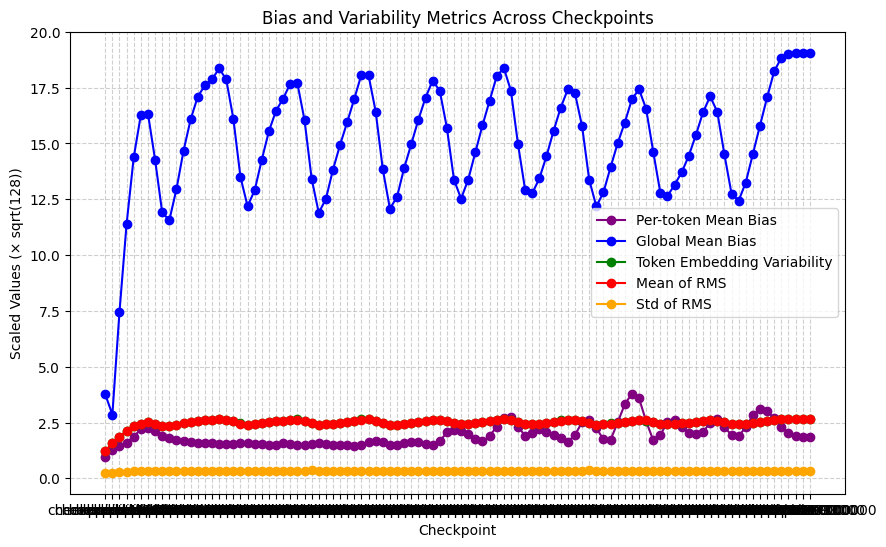

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Multiply relevant columns by sqrt(128)
scale_factor = np.sqrt(128)
df_scaled = df_14m_ztied.copy()
columns_to_scale = ['Per-token Mean Bias', 'Global Mean Bias', 'Token Embedding Variability', 'Mean of RMS', 'Std of RMS']
for col in columns_to_scale:
    df_scaled[col] *= scale_factor

# Define colors for each line
colors = ['purple', 'blue', 'green', 'red', 'orange']

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each line with a unique color and markers
for col, color in zip(columns_to_scale, colors):
    plt.plot(df_scaled['Checkpoint'], df_scaled[col], 
             marker='o', linestyle='-', color=color, markersize=6, label=col)

# Labels and title
plt.xlabel("Checkpoint")
plt.ylabel("Scaled Values (× sqrt(128))")
plt.title("Bias and Variability Metrics Across Checkpoints")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()

# Show the plot
plt.show()


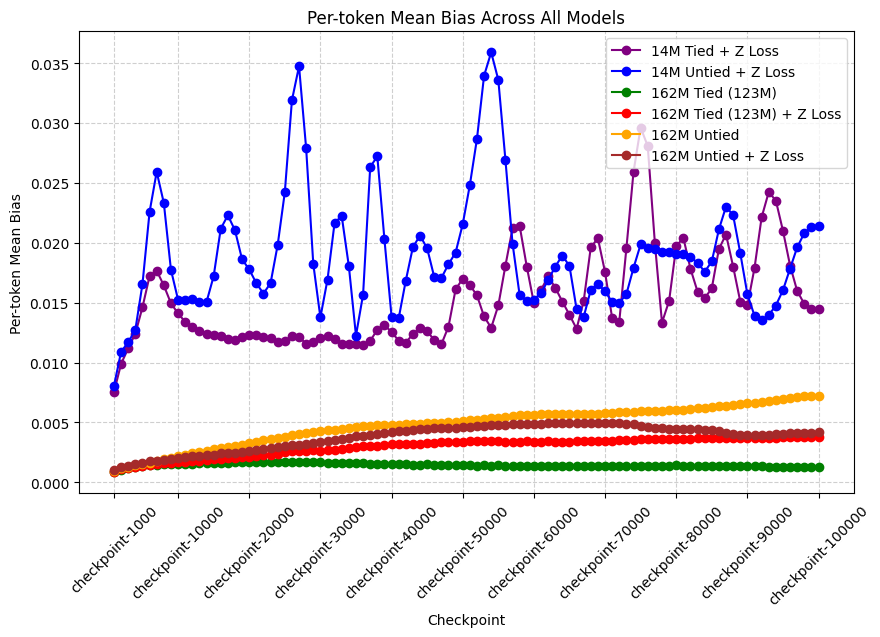

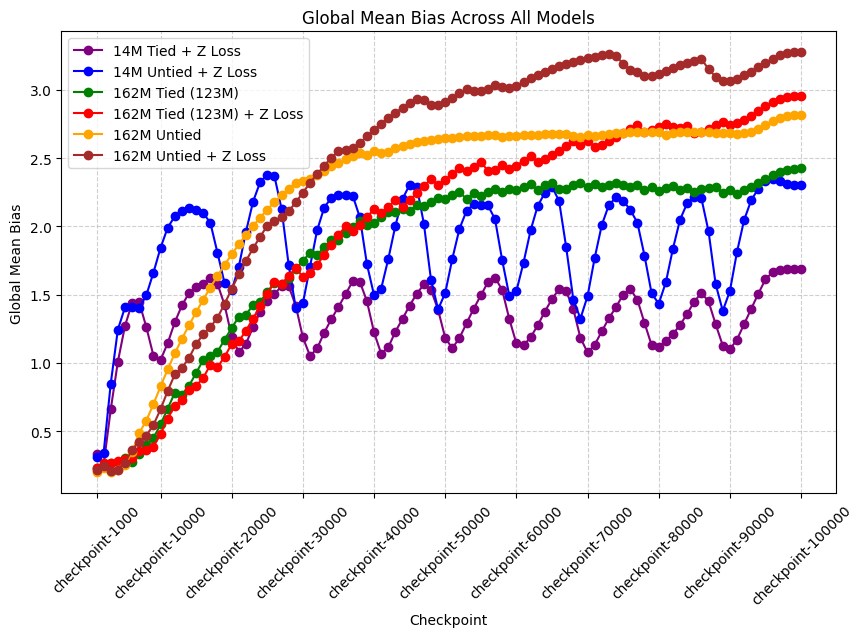

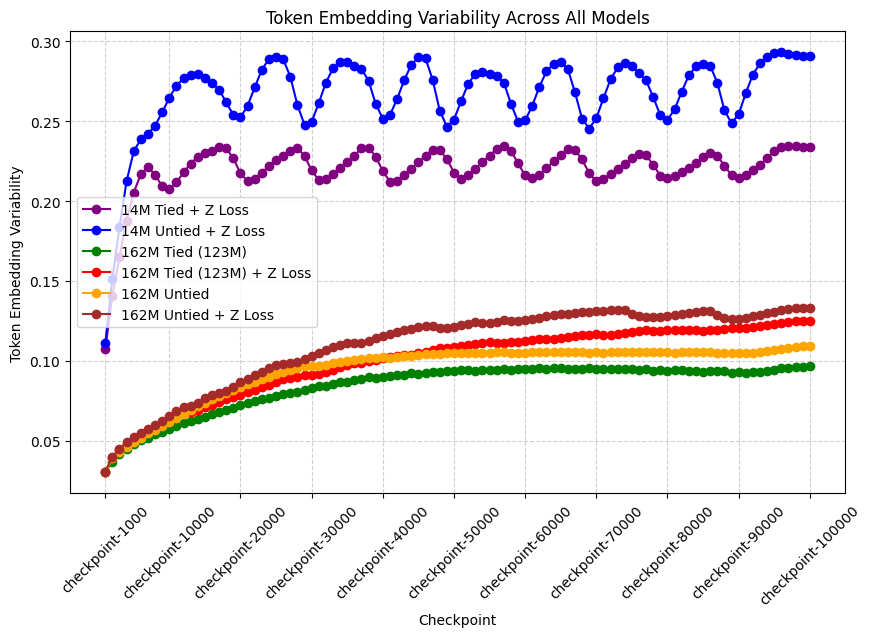

In [61]:
# Mean and Std RMS with Scaling Factors
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re 
# Load datasets
datasets = {
    "14M Tied + Z Loss": pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/14m/14m_zloss_tied.csv"),
    "14M Untied + Z Loss": pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/14m/14m_zloss_untied.csv"),
    "162M Tied (123M)": pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/162m/tied_123m.csv"),
    "162M Tied (123M) + Z Loss": pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/162m/tied_123m_zloss.csv"),
    "162M Untied": pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/162m/untied_162m.csv"),
    "162M Untied + Z Loss": pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/162m/untied_162m_zloss.csv"),
}

# Columns to plot
columns_to_plot = ['Per-token Mean Bias', 'Global Mean Bias', 'Token Embedding Variability']

# Define scaling factors
scale_factors = {
    "14M Tied": np.sqrt(1),
    "14M Untied": np.sqrt(1),
}

default_scale_factor = np.sqrt(1)  # For all other datasets

colors = ['purple', 'blue', 'green', 'red', 'orange', 'brown']  # Different colors for datasets

# Iterate over columns
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    
    # Iterate over datasets
    for (name, df), color in zip(datasets.items(), colors):
        df_scaled = df.copy()
        
        # Apply the correct scaling factor
        scale_factor = scale_factors.get(name, default_scale_factor)
        df_scaled[column] *= scale_factor  

        plt.plot(df_scaled['Checkpoint'], df_scaled[column], 
                 marker='o', linestyle='-', color=color, markersize=6, label=name)
    
    
    indices = [0, 9, 19, 29, 39, 49,59, 69, 79, 89,99]
    xticks = df_scaled['Checkpoint'].iloc[indices].values  # Get Checkpoint values at those indices
    plt.xticks(ticks=xticks, rotation=45)  # Rotate for readability


    # Labels and formatting
    plt.xlabel("Checkpoint")
    plt.ylabel(f"{column}")
    plt.title(f"{column} Across All Models")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend()
    
    # Show the plot
    plt.show()


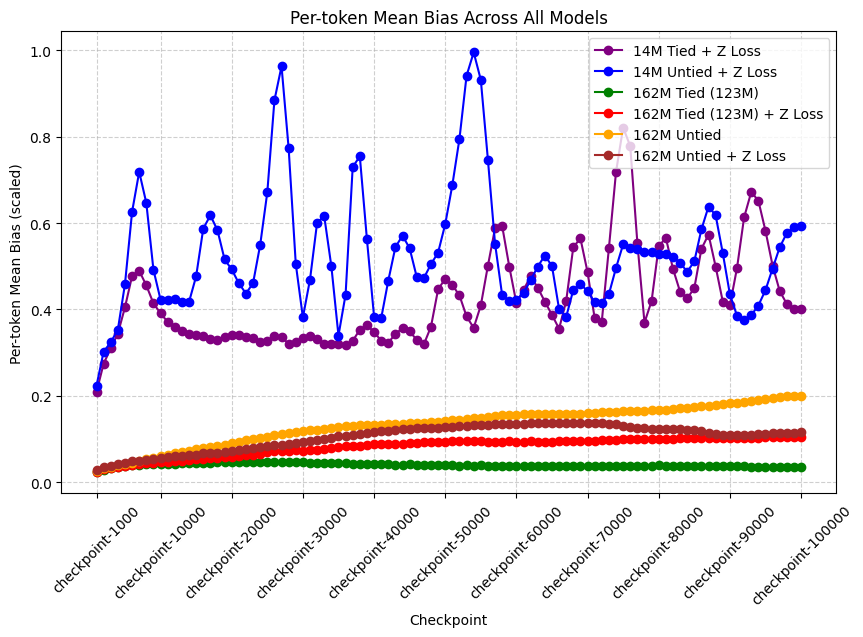

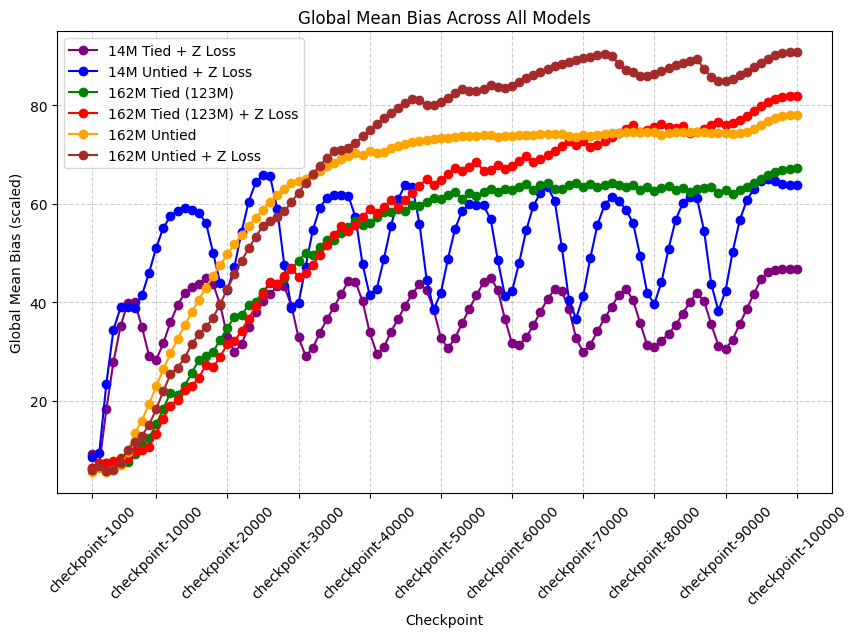

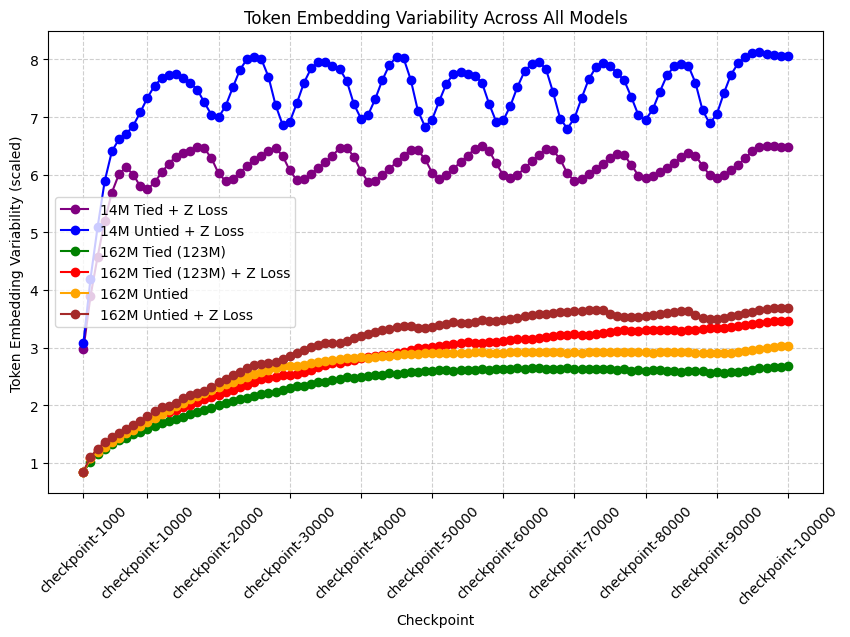

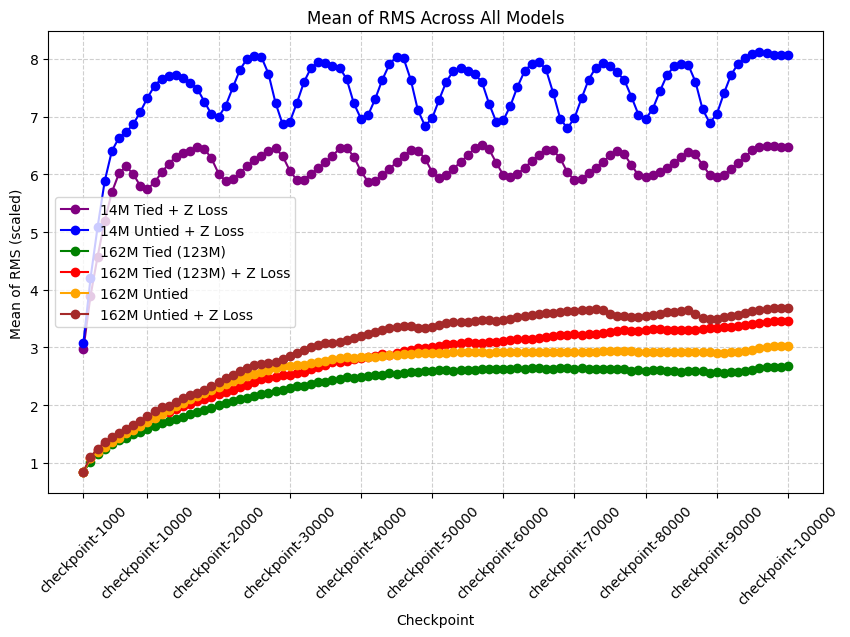

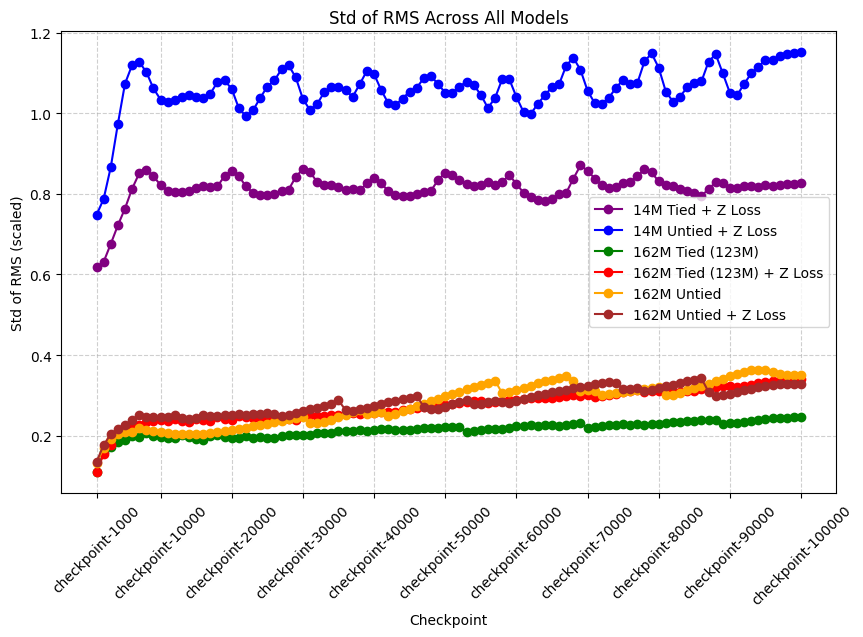

In [62]:
# Mean and Std RMS with Scaling Factors
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re 
# Load datasets
datasets = {
    "14M Tied + Z Loss": pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/14m/14m_zloss_tied.csv"),
    "14M Untied + Z Loss": pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/14m/14m_zloss_untied.csv"),
    "162M Tied (123M)": pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/162m/tied_123m.csv"),
    "162M Tied (123M) + Z Loss": pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/162m/tied_123m_zloss.csv"),
    "162M Untied": pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/162m/untied_162m.csv"),
    "162M Untied + Z Loss": pd.read_csv("/Users/suchirsalhan/PHD/PHD/Notebook/kaist_emb/162m/untied_162m_zloss.csv"),
}

# Columns to plot
columns_to_plot = ['Per-token Mean Bias', 'Global Mean Bias', 'Token Embedding Variability', 'Mean of RMS', 'Std of RMS']

# Define scaling factors
scale_factors = {
    "14M Tied": np.sqrt(128),
    "14M Untied": np.sqrt(128),
}

default_scale_factor = np.sqrt(768)  # For all other datasets

colors = ['purple', 'blue', 'green', 'red', 'orange', 'brown']  # Different colors for datasets

# Iterate over columns
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    
    # Iterate over datasets
    for (name, df), color in zip(datasets.items(), colors):
        df_scaled = df.copy()
        
        # Apply the correct scaling factor
        scale_factor = scale_factors.get(name, default_scale_factor)
        df_scaled[column] *= scale_factor  

        plt.plot(df_scaled['Checkpoint'], df_scaled[column], 
                 marker='o', linestyle='-', color=color, markersize=6, label=name)
    
    
    indices = [0, 9, 19, 29, 39, 49,59, 69, 79, 89,99]
    xticks = df_scaled['Checkpoint'].iloc[indices].values  # Get Checkpoint values at those indices
    plt.xticks(ticks=xticks, rotation=45)  # Rotate for readability


    # Labels and formatting
    plt.xlabel("Checkpoint")
    plt.ylabel(f"{column} (scaled)")
    plt.title(f"{column} Across All Models")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend()
    
    # Show the plot
    plt.show()

